## Working with Tensorflow

Links:
* https://habr.com/post/305578/
* https://web.stanford.edu/class/cs224n/lectures/lecture6.pdf


TensorFlow is a computational framework for building machine learning models.  
TensorFlow provides a variety of different toolkits that allow you to construct models at your preffered level of abstraction.

The following figure shows the current hierarchy of TensorFlow toolkits:

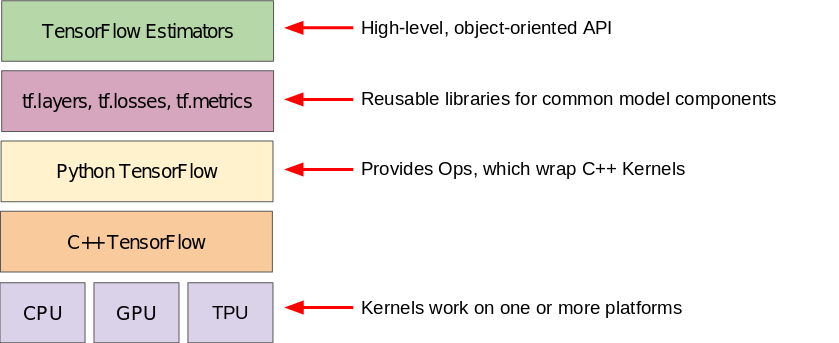

In [ ]:
# Import TensorFlow as tf

In [ ]:
import tensorflow as tf

## Tensors

Tensor is a vector, an array-like object which can hold matrixes, other vectors or to ba a scalar.  

TensorFlow works by first defining and describing our model in abstract, and then, when we are readdy, we make it a reality in the session.  

The description of the model is what is known as your "Computation Graph" in TensorFlow terms.

In [ ]:
import tensorflow as tf

# creates nodes in a graph
# 'construction phase'
x1 = tf.constant(5)
x2 = tf.constant(6)

#  Notice that we still getting an abstract tensor
result = tf.multiply(x1,x2)
print(result)

# To see real value
# Defines our session and launches graph
sess = tf.Session()
# run result
print(sess.run(result))

In [ ]:
# When you are finished with a session,
# you need to close it in order to free
# up the resources that were used
sess.close()

In [ ]:
# Create a constant
# Can be diffirent values
hello = tf.constant("Hello, TensorFlow!")
# 1-D array populated with value list.
tensor = tf.constant([1,2,3,4,5]) // [1,2,3,4,5]
# 2-D array populated with scalar value -1.
tensor = tf.constant(-1.0, shape = [2,3]) #[[-1.,-1.,-1.]
                                          #[-1.,-1.,-.1]]


## Graphs and Sessions

TensorFlow uses a **dataflow graph** to represent your computation in terms of the dependencies between individual operations. This leads to a low-level programming model in which you first define the dataflow graph, then create a TensorFlow **session** to run parts of the graph across a set of local and remote devices.

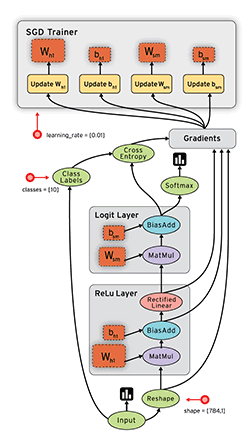

**Dataflow** is a common programming model for parallel computing. In a dataflow graph, the nodes represent units of computation, and the edges represent the data consumed or produced by a computation.

Dataflow has several advantages that TensorFlow leverages when executing your programs:  
1.**Parallelism** - by using explicit edges to represent dependencies between operations, it is easy for the system to identify operations that can execute in parallel.  
2.**Distributed execution** - by using edges to represent the values that flow between operations, it is possible for TensorFlow to partition your program across multiple devices (CPUs, GPUs, and TPUs) attached to diffirent machines. Tensorflow inserts the necessary communication and coordination between devices.  
3.**Compilation** - TensorFlow's XLA compiler can use the information in your dataflow graph to generate faster code, for example, by fusing together adjacent operations.  
4.**Portability** - the dataflow graph is a language independent representation of the code in your model. You canbuild a dataflow in Python, store it in a SavelModel, and restore it in C++ program for low-latency inference.

TensorFlow separates definition of computations from their execution

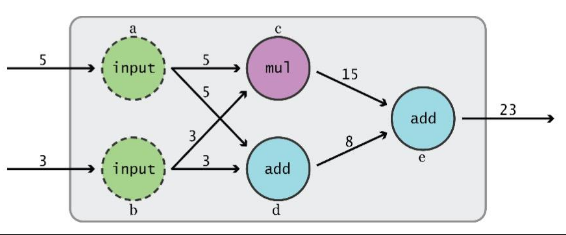

* A graph defines the computation. It doesn't compute anything, it doesn't hold any values, it just defines the operations that you specified in your code.
* A session allows to execute graphs or part of graphs. It allocates resources (on one or more machines) for that and holds the actual values of intermediate results and variables.

**Why graphs?**

1. Same computation. Only run subgraphs that lead to the values you want to fetch
2. Break computation into small, differential pieces to facilitate auto-differentiation
3. Facilitate distributed computation, spread the work across multiple CPUs, GPUs, TPUs, or other devices
4. Many common machine learning models are taught and visualized as directed graphs

In [ ]:
# Defining a graph

graph = tf.Graph()
with graph.as_default():
    variable = tf.Variable(42, name="foo")
    initialize = tf.global_variables_initializer()
    assign = variable.assign(13)

In [ ]:
# Start a session
with tf.Session(graph=graph) as sess:
    hello = tf.constant("Hello, tensor flow!")
    print(sess.run(hello))

In [ ]:
with tf.Session() as sess:
    a = tf.constant(10)
    b = tf.constant(32)

    print(sess.run(a+b))

Defining variables is necessary because this holds the parameters. Without having parameters, training, updating, saving, restoring and any other operations cannot be performed.  
The defined variables in Tensorflow are just tensors with certain shapes and types. The tensors must be initialized with values to become valid.

In [ ]:
with tf.Session() as sess:
    w = tf.Variable(tf.random_normal([3,2], mean=0.0, stddev=0.4), name='weights')
    b = tf.Variable(tf.zeros([2]), name = "biases")
    
    # same cannot get the result without processing it through session
    print(w)
    # still can get value
    initialize = tf.variables_initializer(var_list=(w,b))
    sess.run(initialize)
    print(sess.run(w))

### Devices

https://stackoverflow.com/questions/40061895/what-exactly-is-a-device-in-tensorflow


* A logical device in TensorFlow is a computation unit with its own memory.  
* TensorFlow scheduler adds Send/Recv ops to copy data to proper device when data crosses cross device boundaries.  
* It's a logical device so you can have more logical devices than physical devices (cores) and some of the ops on available "devices" may be scheduled but sit idly waiting until a physical device frees up.
* Logical devices like **cpu:0** are not pinned specific cores, so they can use whichever cores are available.
* You can see what was the actual parallelism by looking at timelines.

In [ ]:
# https://gist.github.com/yaroslavvb/9a5f4a0b613c79152152b35c0bc840b8
# run matmul on diffirent CPU devices

n = 1024

with tf.device("cpu:0"):
    a1 = tf.ones((n, n))
    a2 = tf.ones((n, n))
with tf.device("cpu:1"):
    a3 = tf.matmul(a1, a2)
with tf.device("cpu:2"):
    a4 = tf.matmul(a1, a2)
with tf.device("cpu:3"):
    a5 = tf.matmul(a3, a4)
with tf.device("gpu:0"):
    a5 = tf.matmul(a3, a4)
    

In [ ]:
with tf.device('/gpu:0'):
    w = tf.Variable(tf.random_normal([3,2],mean=0.0,stddev=0.4), name='weights')

In [ ]:
with tf.device("/job:ps/task:0"):
    w = tf.Variable(tf.random_normal([3,2], mean=0.0,stddev=0.4),name="weights")

## Initialization of the variables on tf

In [ ]:
init = tf.global_variables_initializer()

w = tf.Variable(tf.random_normal([3,2], mean=0.0, stddev=0.4),name='weight')
w2 = tf.Variable(w.initialized_value(), name="w2")

### Placeholder

We have used **Variables** to manage our data, but there is a more basic structure, the **placeholder**. A **placeholder** is simply a variable that we will assign data to at a later date.  
It allows us to create our operations and build our computation graph, without needing the data.

In **TensorFlow** terminology, we then *feed* data into the graph through these placeholders.

In [ ]:
#import tensorflow as tf

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

output = tf.multiply(x,y)
with tf.Session() as sess:
    result = sess.run(output, feed_dict={x:2,y:3})

print(result)

In [ ]:
x = tf.placeholder('float', None)
y = x * 2

with tf.Session() as session:
    result = session.run(y, feed_dict={x:[1,2,3]})
    print(result)

1. First, we import `tensorflow` as normal. Then we create a `placeholder` called `x`, i.e. a place in memory where we will store value later on.
2. Then, we create a Tensor called, which is the operation of multiplying `x` by 2. Note that we haven't defined any initial values for `x` yet.
3. We now have an operation (`y`) defined, and can now run it in a session. We create a session object, and then run just the `y` variable. Note that this means, that if we defined a much larger graph of operations, we can run just a small segment of the graph.  
This subgraph evaluation is actually a bit selling point of TensorFlow, and one that isn't present in many other libraries that do similar things

### Broadcasting

Broadcasting is the process of making arrays with different shapes have compatible shapes for arithmetic operations. The terminology is borrowed from Numpy.

Broadcasting may be required for operations between multi-dimensional arrays of different ranks, or between multi-dimensional arrays wuth different but compatible shapes.

|1 2 3| + |7 8 9|  
|4 5 6|


In [ ]:
m = tf.Variable(tf.random_normal([10, 100], mean=0.0, stddev=0.4), name = 'matrix')
v = tf.Variable(tf.random_normal([100], mean=0.0, stddev=0.4), name='vector')

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    result = sess.run(m + v)
    print(result)


https://stackoverflow.com/questions/37098546/difference-between-variable-and-get-variable-in-tensorflow

Pure `tf.Variable` is lowel-level;  

Use tf.get_variable anytime when possible!

In [ ]:
# 1. tf.Variable.__init__: Creates a new variable with *initial_value*.
w = tf.Variable(123, name='integer')

In [ ]:
# reset graph
tf.reset_default_graph()

# Compare tf.Variables and tf.get_variable

# create variables with tf.Variable
s = tf.Variable(2, name="scalar")
m = tf.Variable([[0,1],[2,3]], name='matrix')
W = tf.Variable(tf.zeros([784,10]))

# create variables with tf.get_variable
s = tf.get_variable("scalar", initializer = tf.constant(2))
n = tf.get_variable("matrix", initializer = tf.constant([[0,1], [2,3]]))
W = tf.get_variable("big_matrix", shape=(785, 10), initializer=tf.zeros_initializer())


# tf.variable is better!
# then you HAVE to initialize all variables at once:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
# Initialie only a subset of variables:
with tf.Session() as sess:
    sess.run(tf.variables_initializer([s,n]))

## Variable scope

`tf.variable_scope(name_or_scope, reuse=None, initializer=None`)

Returns a context for variable scope. Variable scope allows to create new variables and to share already created ones while providing checks to not create or share by accident.

* `tf.get_variable` creates and returns a variable with the specified name.
* `tf.variable_scope` manages the namespaces used in `tf.get_variable()`

In [ ]:


def linear_transform(vec, shape):
    with tf.variable_scope('transform'):
        w = tf.get_variable('matrix', shape,
                           initializer=tf.random_normal_initializer())
    return tf.matmul(vec,w)

with tf.variable_scope('linear_transformers') as scope:
    
    vec1 = tf.get_variable('vec1', initializer = tf.zeros([2,3]))
    vec2 = tf.get_variable('vec2', initializer = tf.zeros([2,3]))
    
    shape=[2,3]
    
    result1 = linear_transform(vec1, shape)
    scope.reuse_variables()
    result2 = linear_transform(vec2,shape)

# Practice


## Linear regression training
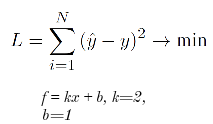

1. Create 1000 random points in [0:1]
2. Calculate for each point $x$ the corrent answer $ y = 2x+1+e, e = N$
3. Initialize $k$ and $b$
4. Calculate the initial loss function
5. Calculate the optimizer, learning rate = 0.001
6. Optimization cycle

In [5]:
import numpy as np
import tensorflow as tf

n_samples, batch_size, num_steps = 1000, 100, 20000
x_data = np.random.uniform(1,10, (n_samples,1))
y_data = 2 * x_data + 1 + np.random.normal(0,2, (n_samples,1))

# reserve memory for variables
X = tf.placeholder(tf.float32, shape=(batch_size, 1))
y = tf.placeholder(tf.float32, shape=(batch_size, 1))

with tf.variable_scope('linear-regression'):
    k = tf.Variable(tf.random_normal((1,1), stddev=0.0, name='slope'))
    b = tf.Variable(tf.zeros((1,)), name='bias')


y_pred = tf.matmul(X,k) + b
loss = tf.reduce_mean((y - y_pred)**2)
optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

display_step = 50

with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(num_steps):
        indices = np.random.choice(n_samples, batch_size)
        x_batch, y_batch = x_data[indices], y_data[indices]
        
        _, loss_val, k_val, b_val = sess.run([optimizer, loss, k, b],
                                            feed_dict = {X:x_batch,
                                                        y: y_batch})
        if (i+1) % display_step == 0:
            print("Epoch %d: %0.8f, k=%.4f, b=%.4f" % (i+1, loss_val, k_val, b_val))

Epoch 50: 3.22990131, k=2.0528, b=0.3161
Epoch 100: 4.41295338, k=2.0933, b=0.3314
Epoch 150: 4.18284130, k=2.0844, b=0.3428
Epoch 200: 3.56504464, k=2.1016, b=0.3570
Epoch 250: 4.56904936, k=2.0957, b=0.3667
Epoch 300: 2.70547485, k=2.0924, b=0.3783
Epoch 350: 4.56062794, k=2.0927, b=0.3879
Epoch 400: 4.23727131, k=2.0946, b=0.3977
Epoch 450: 3.80257273, k=2.0724, b=0.4043
Epoch 500: 3.91306710, k=2.0932, b=0.4162
Epoch 550: 3.37396312, k=2.0818, b=0.4259
Epoch 600: 3.55570436, k=2.0854, b=0.4332
Epoch 650: 3.57802248, k=2.0788, b=0.4440
Epoch 700: 5.79048824, k=2.0975, b=0.4561
Epoch 750: 2.94457817, k=2.0819, b=0.4623
Epoch 800: 4.24367571, k=2.0847, b=0.4717
Epoch 850: 3.48532009, k=2.0828, b=0.4810
Epoch 900: 4.29428148, k=2.0893, b=0.4910
Epoch 950: 3.87322927, k=2.0918, b=0.4990
Epoch 1000: 4.85253334, k=2.0841, b=0.5080
Epoch 1050: 3.88820505, k=2.0626, b=0.5114
Epoch 1100: 4.54047155, k=2.0682, b=0.5198
Epoch 1150: 4.49430704, k=2.0691, b=0.5281
Epoch 1200: 3.30325198, k=2.072

Epoch 10050: 3.46603322, k=2.0225, b=0.9238
Epoch 10100: 3.70546055, k=2.0192, b=0.9230
Epoch 10150: 4.03760338, k=2.0222, b=0.9242
Epoch 10200: 3.17701745, k=2.0108, b=0.9224
Epoch 10250: 3.17060208, k=2.0263, b=0.9264
Epoch 10300: 3.50051332, k=2.0134, b=0.9242
Epoch 10350: 5.16129208, k=2.0057, b=0.9229
Epoch 10400: 3.47930121, k=2.0059, b=0.9219
Epoch 10450: 4.23597956, k=2.0175, b=0.9229
Epoch 10500: 4.27372122, k=2.0133, b=0.9238
Epoch 10550: 4.55807495, k=2.0150, b=0.9249
Epoch 10600: 4.05537701, k=2.0088, b=0.9250
Epoch 10650: 3.74694037, k=2.0117, b=0.9255
Epoch 10700: 3.53882384, k=2.0222, b=0.9267
Epoch 10750: 4.11931229, k=2.0044, b=0.9238
Epoch 10800: 3.26048160, k=1.9983, b=0.9244
Epoch 10850: 4.49727917, k=2.0118, b=0.9285
Epoch 10900: 3.74115777, k=2.0185, b=0.9301
Epoch 10950: 3.08981514, k=2.0125, b=0.9302
Epoch 11000: 4.81680775, k=2.0123, b=0.9289
Epoch 11050: 4.26194048, k=2.0086, b=0.9282
Epoch 11100: 3.90958071, k=2.0125, b=0.9294
Epoch 11150: 4.03878641, k=2.006

Epoch 19700: 3.78457165, k=2.0226, b=0.9395
Epoch 19750: 3.87380767, k=2.0056, b=0.9378
Epoch 19800: 4.50586891, k=2.0116, b=0.9406
Epoch 19850: 4.17868614, k=2.0076, b=0.9407
Epoch 19900: 4.67745829, k=2.0142, b=0.9422
Epoch 19950: 3.25973606, k=2.0066, b=0.9416
Epoch 20000: 3.96963978, k=2.0125, b=0.9414
